In [1]:
# 라이브러리 추가하기
import geopandas as gpd
from fiona.crs import from_epsg
%matplotlib inline

#### 서울시 행정동 goeJson 불러오기
* GeoDataframe 생성하기
* 데이터 확인하기
* plot()으로 지도 확인하기

In [2]:
# _01 서울시 법정동 geojson 파일
_seoul_h_dong = './output/seoul_h_dong.geojson'

In [3]:
# _02 GeoDataFrame
seoul_h_dong_gdf = gpd.read_file(_seoul_h_dong)
print(seoul_h_dong_gdf.crs, '\n')
seoul_h_dong_gdf.info()
seoul_h_dong_gdf.head(10)

epsg:4326 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SGG_NM      424 non-null    object  
 1   DONG_NM     424 non-null    object  
 2   SGG_CODE    424 non-null    object  
 3   SEDAE       424 non-null    int64   
 4   SEDAE_INGU  424 non-null    float64 
 5   TOTAL_POP   424 non-null    int64   
 6   MALE_POP    424 non-null    int64   
 7   FEMALE_POP  424 non-null    int64   
 8   65_OVER     424 non-null    int64   
 9   geometry    424 non-null    geometry
dtypes: float64(1), geometry(1), int64(5), object(3)
memory usage: 33.2+ KB


,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geometry
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."
5,종로구,교남동,11110,4379,2.34,10363,4850,5513,1406,"POLYGON ((126.96905 37.56819, 126.96801 37.567..."
6,종로구,가회동,11110,2085,2.17,4657,2194,2463,900,"POLYGON ((126.98914 37.59131, 126.98831 37.587..."
7,종로구,종로1.2.3.4가동,11110,5378,1.41,8592,5045,3547,1865,"POLYGON ((126.99650 37.58102, 126.99641 37.580..."
8,종로구,종로5·6가동,11110,3174,1.69,5690,3096,2594,1089,"POLYGON ((127.01016 37.57157, 127.00959 37.569..."
9,종로구,이화동,11110,4462,1.85,8752,4075,4677,1302,"POLYGON ((127.00733 37.58320, 127.00884 37.580..."


<AxesSubplot:>

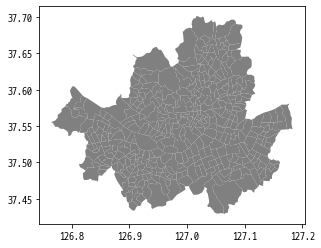

In [4]:
# _03 법정동 지도 보기
seoul_h_dong_gdf.plot(color='gray')

####  Dissolve를 이용해 행정동 -> 시군구 지도 데이터 만들기

!['dissove'](./data/dissolve.png)

In [16]:
# _04 Dissolve를 이용해 시군구 데이터 만들기
seoul_sgg = seoul_h_dong_gdf.dissolve(by=['SGG_NM','SGG_CODE'], aggfunc='sum')
seoul_sgg.head()

,,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
SGG_NM,SGG_CODE,,,,,,,
강남구,11680,"POLYGON ((127.11880 37.47280, 127.11961 37.471...",231612,54.29,561052,268941,292111,65060
강동구,11740,"POLYGON ((127.12874 37.52379, 127.11916 37.528...",177407,45.24,440359,218699,221660,56161
강북구,11305,"POLYGON ((127.02998 37.61234, 127.02722 37.612...",142533,29.67,328002,160252,167750,56530
강서구,11500,"POLYGON ((126.85669 37.57477, 126.85775 37.574...",254257,47.24,608255,296175,312080,76032
관악구,11620,"POLYGON ((126.96848 37.44679, 126.96827 37.446...",255352,42.12,520929,262006,258923,70046


In [18]:
# _05 index 초기화하기
seoul_sgg.reset_index(inplace=True)
seoul_sgg.head()

,index,SGG_NM,SGG_CODE,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
0,0,강남구,11680,"POLYGON ((127.11880 37.47280, 127.11961 37.471...",231612,54.29,561052,268941,292111,65060
1,1,강동구,11740,"POLYGON ((127.12874 37.52379, 127.11916 37.528...",177407,45.24,440359,218699,221660,56161
2,2,강북구,11305,"POLYGON ((127.02998 37.61234, 127.02722 37.612...",142533,29.67,328002,160252,167750,56530
3,3,강서구,11500,"POLYGON ((126.85669 37.57477, 126.85775 37.574...",254257,47.24,608255,296175,312080,76032
4,4,관악구,11620,"POLYGON ((126.96848 37.44679, 126.96827 37.446...",255352,42.12,520929,262006,258923,70046


In [19]:
# _06 정보확인
seoul_sgg.info()
seoul_sgg.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       25 non-null     int64   
 1   SGG_NM      25 non-null     object  
 2   SGG_CODE    25 non-null     object  
 3   geometry    25 non-null     geometry
 4   SEDAE       25 non-null     int64   
 5   SEDAE_INGU  25 non-null     float64 
 6   TOTAL_POP   25 non-null     int64   
 7   MALE_POP    25 non-null     int64   
 8   FEMALE_POP  25 non-null     int64   
 9   65_OVER     25 non-null     int64   
dtypes: float64(1), geometry(1), int64(6), object(2)
memory usage: 2.1+ KB


,index,SGG_NM,SGG_CODE,geometry,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
0,0,강남구,11680,"POLYGON ((127.11880 37.47280, 127.11961 37.471...",231612,54.29,561052,268941,292111,65060
1,1,강동구,11740,"POLYGON ((127.12874 37.52379, 127.11916 37.528...",177407,45.24,440359,218699,221660,56161
2,2,강북구,11305,"POLYGON ((127.02998 37.61234, 127.02722 37.612...",142533,29.67,328002,160252,167750,56530
3,3,강서구,11500,"POLYGON ((126.85669 37.57477, 126.85775 37.574...",254257,47.24,608255,296175,312080,76032
4,4,관악구,11620,"POLYGON ((126.96848 37.44679, 126.96827 37.446...",255352,42.12,520929,262006,258923,70046


<class 'geopandas.geodataframe.GeoDataFrame'>
epsg:4326


<AxesSubplot:>

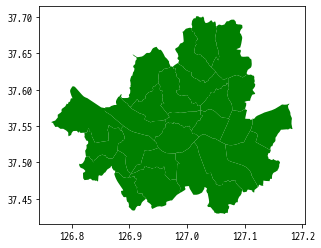

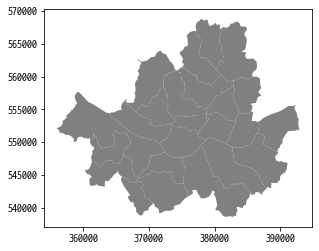

In [20]:
# _07 plot으로 그려보기
print(type(seoul_sgg))
print(seoul_sgg.crs)
seoul_sgg2 = seoul_sgg.to_crs(epsg=5185)
seoul_sgg.plot(color='green')
seoul_sgg2.plot(color='gray')

In [21]:
# _08 시군구 geojson 생성하기
seoul_sgg.to_file('./output/seoul_sgg.geojson' , driver='GeoJSON')

# 서울시 스타벅스 매장 목록
* 서울시 스타벅스 매장 목록 엑셀 파일 불러오기
* 위도, 경도 좌표 정보를 이용해 GeoDataFrame으로 변환하기
* 서울시 스타벅스 매장 목록 데이터를 지도파일로 저장하기

In [5]:
# _10 pandas를 이용해 서울시 스타벅스 목록 데이터(엑셀) 불러오기
import pandas as pd
seoul_starbucks = pd.read_excel('./data/seoul_starbucks.xlsx')
seoul_starbucks.info()
seoul_starbucks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STORE_NAME  501 non-null    object 
 1   LAT         501 non-null    float64
 2   LONG        501 non-null    float64
 3   STORE_TYPE  501 non-null    object 
 4   ADDRESS     501 non-null    object 
 5   SIG_KOR_NM  501 non-null    object 
 6   SIG_CD      501 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


,STORE_NAME,LAT,LONG,STORE_TYPE,ADDRESS,SIG_KOR_NM,SIG_CD
0,역삼아레나빌딩,37.501087,127.043069,general,서울특별시 강남구 언주로 425 (역삼동),강남구,11680
1,논현역사거리,37.510178,127.022223,general,서울특별시 강남구 강남대로 538 (논현동),강남구,11680
2,국기원사거리,37.499517,127.031495,general,서울특별시 강남구 테헤란로 125 (역삼동),강남구,11680
3,대치대원빌딩R,37.494668,127.062583,reserve,서울특별시 강남구 남부순환로 2947 (대치동),강남구,11680
4,삼성역섬유센터R,37.507750,127.060651,reserve,서울특별시 강남구 테헤란로 518 (대치동),강남구,11680


In [6]:
seoul_starbucks.dtypes

STORE_NAME     object
LAT           float64
LONG          float64
STORE_TYPE     object
ADDRESS        object
SIG_KOR_NM     object
SIG_CD          int64
dtype: object

In [7]:
# _11 시군구 코드를 문자타입으로 변경하기
seoul_starbucks = seoul_starbucks.astype({'SIG_CD':'str'})
seoul_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STORE_NAME  501 non-null    object 
 1   LAT         501 non-null    float64
 2   LONG        501 non-null    float64
 3   STORE_TYPE  501 non-null    object 
 4   ADDRESS     501 non-null    object 
 5   SIG_KOR_NM  501 non-null    object 
 6   SIG_CD      501 non-null    object 
dtypes: float64(2), object(5)
memory usage: 27.5+ KB


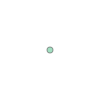

In [8]:
# _12 엑셀 파일의 위도 경도 데이터를 Point타압의 geometry 데이터로 변환하기
geometry = gpd.points_from_xy(seoul_starbucks.LONG, seoul_starbucks.LAT)
geometry[0]

In [9]:
# _13 GeoDataFrame 생성하기
coulumns = ['STORE_NAME', 'STORE_TYPE', 'ADDRESS', 'SIG_CD', 'SIG_KOR_NM']
seoul_sb_gdf = gpd.GeoDataFrame(seoul_starbucks[coulumns], geometry=geometry, crs=from_epsg(4326))
seoul_sb_gdf.info()
seoul_sb_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STORE_NAME  501 non-null    object  
 1   STORE_TYPE  501 non-null    object  
 2   ADDRESS     501 non-null    object  
 3   SIG_CD      501 non-null    object  
 4   SIG_KOR_NM  501 non-null    object  
 5   geometry    501 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 23.6+ KB


C:\Users\user\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,STORE_NAME,STORE_TYPE,ADDRESS,SIG_CD,SIG_KOR_NM,geometry
0,역삼아레나빌딩,general,서울특별시 강남구 언주로 425 (역삼동),11680,강남구,POINT (127.04307 37.50109)
1,논현역사거리,general,서울특별시 강남구 강남대로 538 (논현동),11680,강남구,POINT (127.02222 37.51018)
2,국기원사거리,general,서울특별시 강남구 테헤란로 125 (역삼동),11680,강남구,POINT (127.03150 37.49952)
3,대치대원빌딩R,reserve,서울특별시 강남구 남부순환로 2947 (대치동),11680,강남구,POINT (127.06258 37.49467)
4,삼성역섬유센터R,reserve,서울특별시 강남구 테헤란로 518 (대치동),11680,강남구,POINT (127.06065 37.50775)


In [10]:
# _14 타입 확인
print(type(seoul_sb_gdf))
print(seoul_sb_gdf.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
+init=epsg:4326 +no_defs +type=crs


In [11]:
# 폴더생성
!mkdir .\output\final

���� ���͸� �Ǵ� ���� .\output\final��(��) �̹� �ֽ��ϴ�.


In [12]:
# _15 서울시 스타벅스 매장 지도 파일 생성하기
seoul_sb_gdf.to_file('./output/final/seoul_starbucks.geojson', driver='GeoJSON')

## 데이터 전처리
* 서울시 시군구 데이터의 새로운 컬럼에 스타벅스 개수 세어 저장하기

In [13]:
# _01 파일 경로 서울시 시군구 통계, 서울시 스타벅스 매장 지도파일
_seoul_sgg = './output/seoul_sgg.geojson'
_seoul_sb = './output/final/seoul_starbucks.geojson'

In [22]:
# _02 서울시 시군구 지도 데이터 불러오기
seoul_sgg_gdf = gpd.read_file(_seoul_sgg)
seoul_sgg_gdf.info()
seoul_sgg_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       25 non-null     int64   
 1   SGG_NM      25 non-null     object  
 2   SGG_CODE    25 non-null     object  
 3   SEDAE       25 non-null     int64   
 4   SEDAE_INGU  25 non-null     float64 
 5   TOTAL_POP   25 non-null     int64   
 6   MALE_POP    25 non-null     int64   
 7   FEMALE_POP  25 non-null     int64   
 8   65_OVER     25 non-null     int64   
 9   geometry    25 non-null     geometry
dtypes: float64(1), geometry(1), int64(6), object(2)
memory usage: 2.1+ KB


,index,SGG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geometry
0,0,강남구,11680,231612,54.29,561052,268941,292111,65060,"POLYGON ((127.11880 37.47280, 127.11961 37.471..."
1,1,강동구,11740,177407,45.24,440359,218699,221660,56161,"POLYGON ((127.12874 37.52379, 127.11916 37.528..."
2,2,강북구,11305,142533,29.67,328002,160252,167750,56530,"POLYGON ((127.02998 37.61234, 127.02722 37.612..."
3,3,강서구,11500,254257,47.24,608255,296175,312080,76032,"POLYGON ((126.85669 37.57477, 126.85775 37.574..."
4,4,관악구,11620,255352,42.12,520929,262006,258923,70046,"POLYGON ((126.96848 37.44679, 126.96827 37.446..."


In [23]:
# _03 서울시 스타벅스 매장 지도 데이터 불러오기
seoul_sb_gdf = gpd.read_file(_seoul_sb)
seoul_sb_gdf.info()
seoul_sb_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STORE_NAME  501 non-null    object  
 1   STORE_TYPE  501 non-null    object  
 2   ADDRESS     501 non-null    object  
 3   SIG_CD      501 non-null    object  
 4   SIG_KOR_NM  501 non-null    object  
 5   geometry    501 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 23.6+ KB


,STORE_NAME,STORE_TYPE,ADDRESS,SIG_CD,SIG_KOR_NM,geometry
0,역삼아레나빌딩,general,서울특별시 강남구 언주로 425 (역삼동),11680,강남구,POINT (127.04307 37.50109)
1,논현역사거리,general,서울특별시 강남구 강남대로 538 (논현동),11680,강남구,POINT (127.02222 37.51018)
2,국기원사거리,general,서울특별시 강남구 테헤란로 125 (역삼동),11680,강남구,POINT (127.03150 37.49952)
3,대치대원빌딩R,reserve,서울특별시 강남구 남부순환로 2947 (대치동),11680,강남구,POINT (127.06258 37.49467)
4,삼성역섬유센터R,reserve,서울특별시 강남구 테헤란로 518 (대치동),11680,강남구,POINT (127.06065 37.50775)


In [24]:
# _04 pandas를 이용해 서울시 시군구별 스타벅스 매장 개수 세기
starbucks_sgg_count = seoul_sb_gdf.pivot_table(
    index = 'SIG_CD', 
    values='SIG_KOR_NM', 
    aggfunc='count').rename(columns={'SIG_KOR_NM':'COUNT'})

starbucks_sgg_count.head()

,COUNT
SIG_CD,
11110,36
11140,51
11170,17
11200,9
11215,15


In [25]:
# _05 pandas merge를 이용해 서울시 시군구 데이터에 스타벅스 매장 개수 컬럼 병합하기
seoul_sgg_final = pd.merge(
    seoul_sgg_gdf, 
    starbucks_sgg_count,
    how='left',
    left_on='SGG_CODE',
    right_on='SIG_CD'
)
seoul_sgg_final.head()

,index,SGG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geometry,COUNT
0,0,강남구,11680,231612,54.29,561052,268941,292111,65060,"POLYGON ((127.11880 37.47280, 127.11961 37.471...",76
1,1,강동구,11740,177407,45.24,440359,218699,221660,56161,"POLYGON ((127.12874 37.52379, 127.11916 37.528...",13
2,2,강북구,11305,142533,29.67,328002,160252,167750,56530,"POLYGON ((127.02998 37.61234, 127.02722 37.612...",5
3,3,강서구,11500,254257,47.24,608255,296175,312080,76032,"POLYGON ((126.85669 37.57477, 126.85775 37.574...",15
4,4,관악구,11620,255352,42.12,520929,262006,258923,70046,"POLYGON ((126.96848 37.44679, 126.96827 37.446...",11


In [26]:
print(type(seoul_sgg_final))
print(seoul_sgg_final.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
epsg:4326


In [27]:
# _06 서울시 시군구별 통계 지도 데이터 저장하기
seoul_sgg_final.to_file('./output/final/seoul_sgg_stat.geojson', driver='GeoJSON')